<div align="center">
  <img src="../Logo/Logo\Ahjin_Logo-removebg-preview.png" 
       alt="Ajhin Logo" 
       style="width:250px; height:250px; border-radius:50%;">
</div>

# BUSINESS UNDERSTANDING

# DATA UNDERSTANDING



In [128]:
# ------- [Import all relevant libraries] -------

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Usual Suspects
import numpy as np           # Mathematical operations
import pandas as pd          # Data manipulation

# Visualization
import matplotlib.pyplot as plt
#plt.style.use('seaborn-v0_8-whitegrid')
import seaborn as sns
sns.set_style('darkgrid')

# String manipulation
import re

# Mathematical Operations
import math

# Pipelines
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

# ML
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, LabelEncoder    
from sklearn.model_selection import train_test_split, GridSearchCV                                              

# ML Model Evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, 
    roc_auc_score, classification_report,
)

# Handle class imbalance
from imblearn.over_sampling import SMOTE

# Model interpretability
from lime import lime_tabular

# Display settings
pd.set_option('display.max_colwidth', None)
from IPython.display import display

#### Now to load the data and print it out.

In [129]:
# Load data
data = pd.read_csv('../Data/SyriaTel Customer Churn.csv')
data

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


##### *Observation:*

The data is consistent from top to bottom.

phone number is a Personal Identification Information (PII). To maintain discretion, it will be dropped.

In [130]:
# Drop PII
data = data.drop(columns=['phone number'])

In [131]:
# ---- [Initial Data Exploration (IDE)] ----

# # Check dataset shape
print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns.")

# Check columns
print('\n'+'--'*46)
print("Columns:")
display(data.columns)

# Check metadata
print('\n'+'--'*46)
print("Metadata Check:")
display(data.info())

# Descriptive statistics
print('\n'+'--'*46)
print("Descriptive Statistics For Numeric Variables:")
display(data.describe().T)

# Categorical Variables
print('\n'+'--'*46)
print("Descriptive Statistics For Categorical Variables:")
display(data.describe(include='object').T)

The dataset has 3333 rows and 20 columns.

--------------------------------------------------------------------------------------------
Columns:


Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')


--------------------------------------------------------------------------------------------
Metadata Check:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-nul

None


--------------------------------------------------------------------------------------------
Descriptive Statistics For Numeric Variables:


,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00



--------------------------------------------------------------------------------------------
Descriptive Statistics For Categorical Variables:


,count,unique,top,freq
state,3333,51,WV,106
international plan,3333,2,no,3010
voice mail plan,3333,2,no,2411


##### *Observation:*

- The dataset has 3333 customers and 20 features describing usage, plans, and churn.  
- There are 3 categorical features (state, international plan, voice mail plan) and 1 boolean target (churn). The rest are numeric.  
- Most customers have an account length around 101 months, with some staying as long as 243 months.  
- Daily, evening, and night usage minutes are fairly high, with average day minutes ~180, evening ~201, and night ~201, showing that customers use all time periods extensively.  
- Calls and charges are consistent with minutes — longer usage leads to higher charges.  
- International usage is relatively low (~10 minutes/day on average, 4–5 calls).  
- Most customers make 1–2 calls to customer service, but a few call up to 9 times.  
- Customers are spread across 51 states, with West Virginia (WV) being the largest group.  
- Most customers do not have an international plan (3010/3333) or a voice mail plan (2411/3333).  

#### Now that we understand our data, let's check it's completeness and quality.

In [132]:
# Check and remove duplicates
print("Duplicates:", data.duplicated().sum())

# Check data completeness
print('\n'+'--'*20)
print("Missingness check:")
display(data.isna().sum())

Duplicates: 0

----------------------------------------
Missingness check:


state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

##### *Observation:*

- The dataset has no duplicate rows, indicating each record is unique.  
- There are no missing values in any of the 20 columns.  
- All features are fully populated.  

# EXPLORATORY DATA ANALYSIS (EDA)

First, rename the columns so they are more pythonic and easier to work with in code.

In [133]:
# Create rename map
rename_map = {
    'state': 'state',
    'account length': 'account_length',
    'area code': 'area_code',
    'international plan': 'intl_plan',
    'voice mail plan': 'voicemail_plan',
    'number vmail messages': 'no_of_vmail_msgs',
    'total day minutes': 'total_day_mins',
    'total day calls': 'total_day_calls',
    'total day charge': 'total_day_charge',
    'total eve minutes': 'total_eve_mins',
    'total eve calls': 'total_eve_calls',
    'total eve charge': 'total_eve_charge',
    'total night minutes': 'total_night_mins',
    'total night calls': 'total_night_calls',
    'total night charge': 'total_night_charge',
    'total intl minutes': 'total_intl_mins',
    'total intl calls': 'total_intl_calls',
    'total intl charge': 'total_intl_charge',
    'customer service calls': 'customer_service_calls',
    'churn': 'churn'
}

# Rename columns
data = data.rename(columns=rename_map)

## UNIVARIATE ANALYSIS

### 1. NUMERICAL VARIABLES

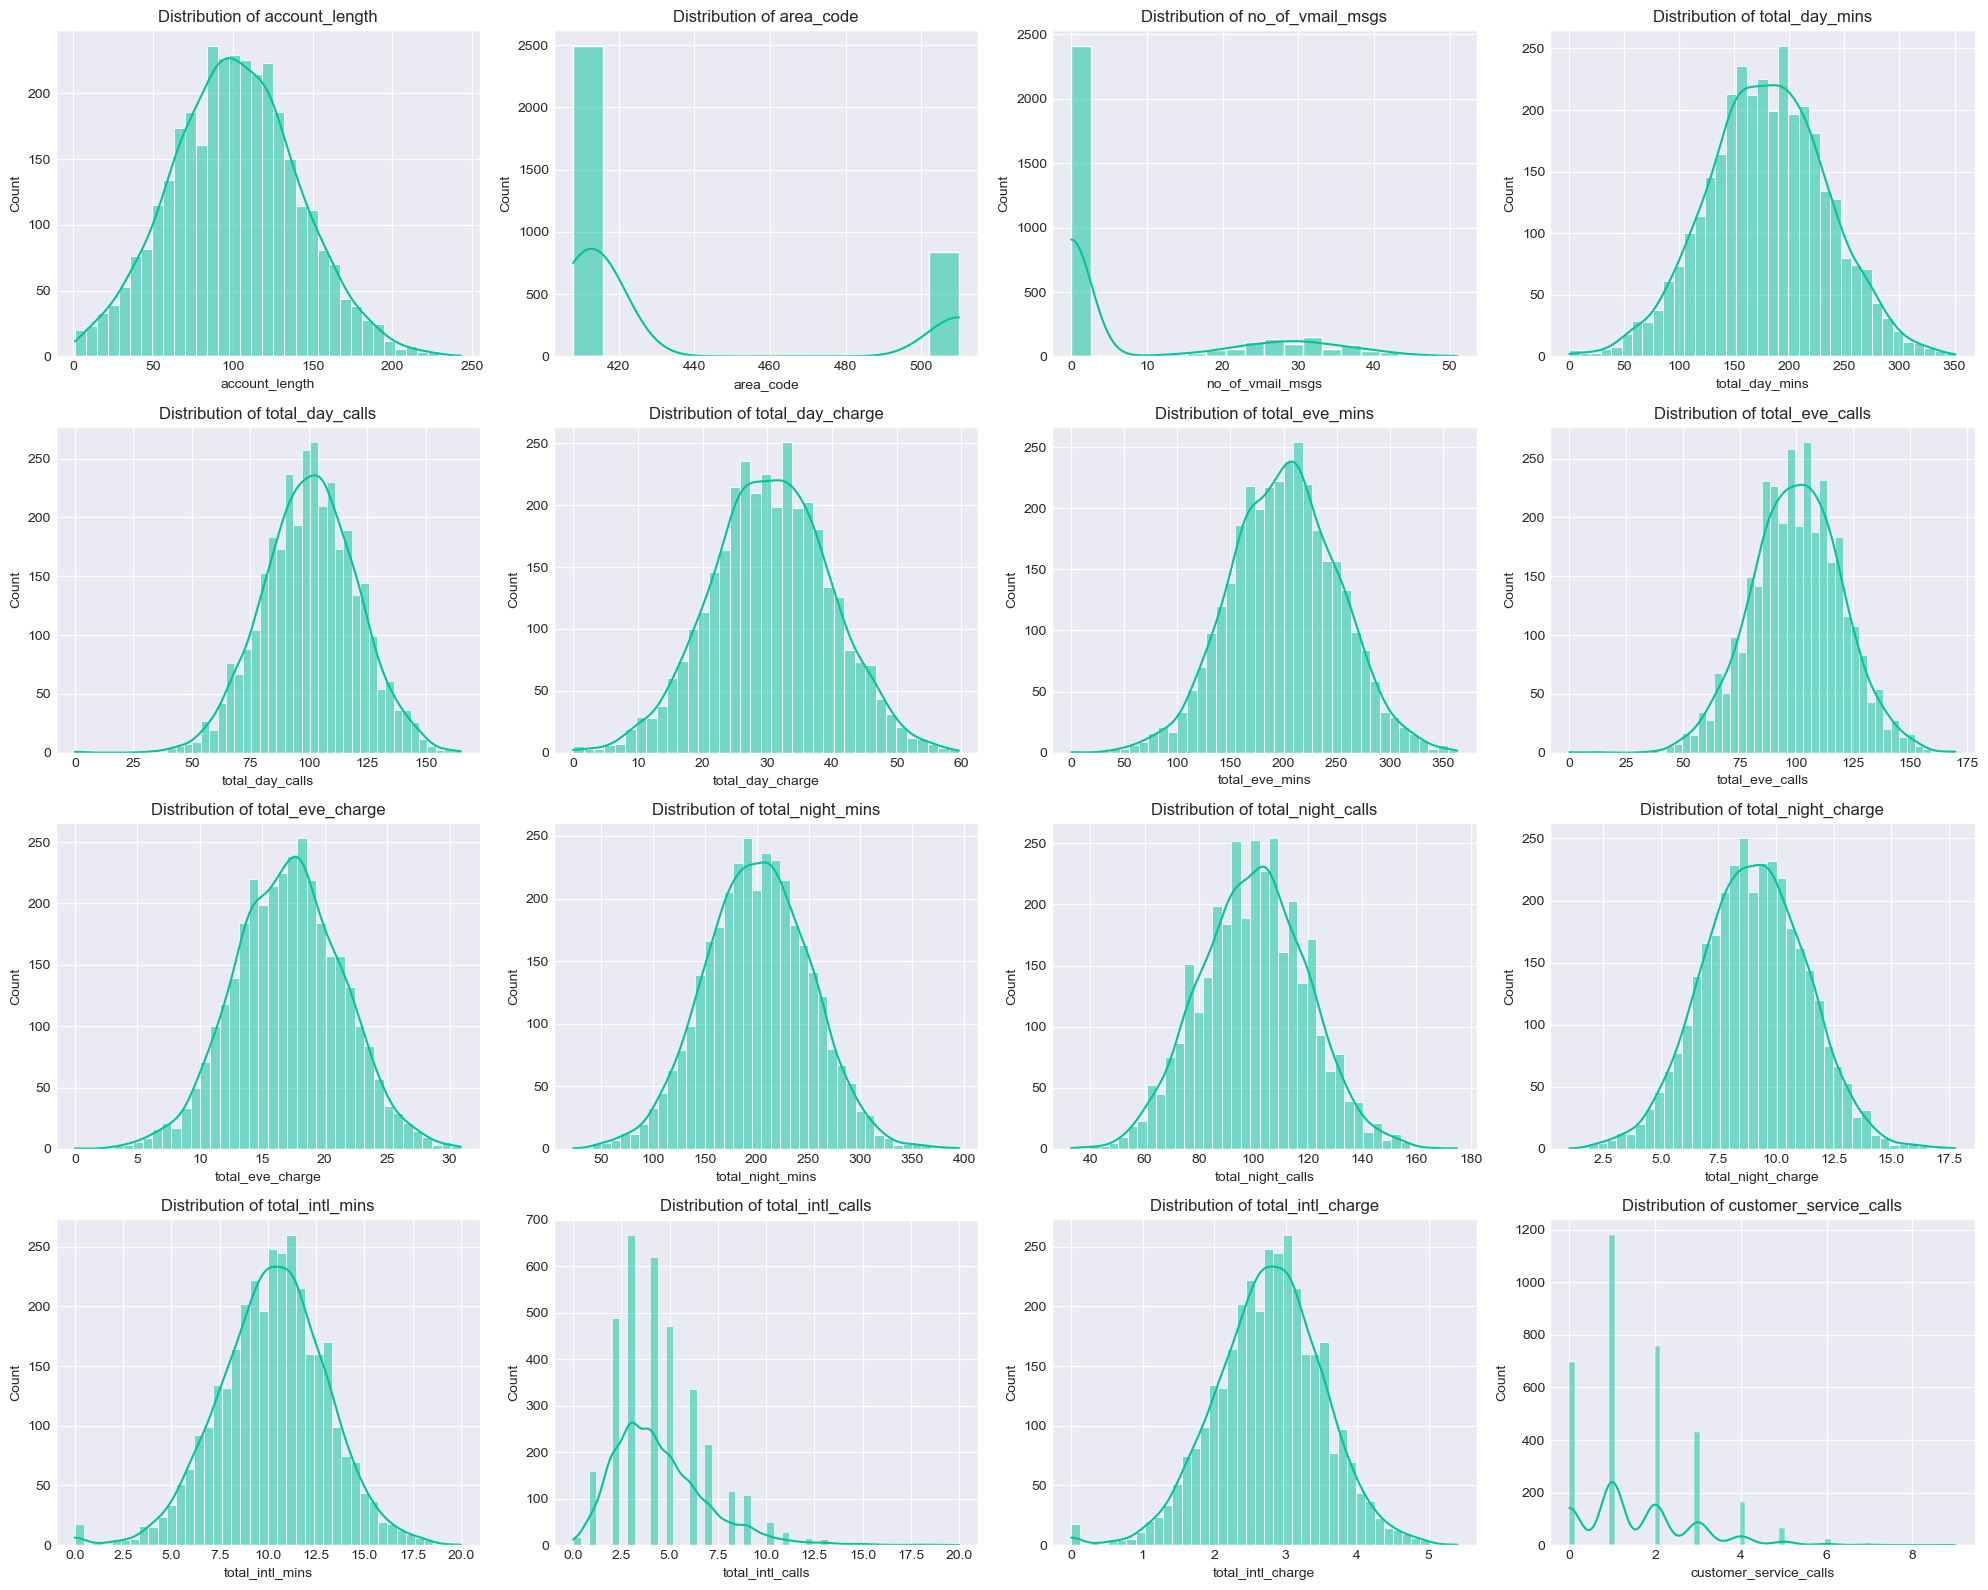

In [134]:
# Plot
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
n_cols = 4 
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(data[col], kde=True, ax=axes[i], color='#00C49A')
    axes[i].set_title(f'Distribution of {col}')

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### *Observation:*

- Most usage-related variables (day, evening, night minutes and calls) form smooth, roughly bell-shaped curves, showing that most customers fall around an average level of usage with fewer very low or very high users.
- Voicemail messages are heavily right-skewed, indicating that the majority of customers rarely or never use voicemail, while a small subgroup uses it frequently.
- International minutes and international calls also show strong right-skewness, reinforcing that international usage is uncommon and concentrated among a small subset of customers.
- Customer service calls have a stepped, uneven distribution, with clear clusters around 0–3 calls and a sharp drop afterwards. This pattern suggests a small group of customers experiencing repeated issues, making this variable especially important for churn prediction.
- Charge variables mirror the shapes of their corresponding minute variables because they are linear transformations, adding no new information and creating redundancy.

### 2. CATEGORICAL VARIABLES

#### Target Variable - Churn
First we map the boolean variables into integers for easier working down the line and then check how the distribution looks like

churn
0    2850
1     483
Name: count, dtype: int64

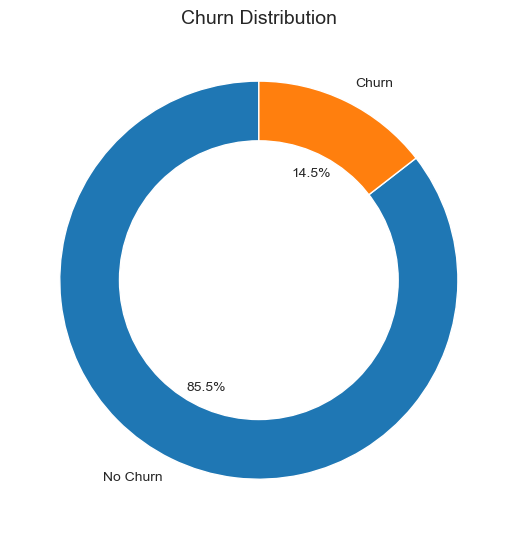

In [135]:
# Map churn boolean to integer
data['churn'] = data['churn'].map({False: 0, True: 1})

# Check distribution
churn_counts = data['churn'].value_counts()
display(churn_counts)

# Palette
colors = ['#1F77B4', '#FF7F0E']   
 
fig, ax = plt.subplots(figsize=(5.5, 5.5))
wedges, texts, autotexts = ax.pie(
    churn_counts,
    labels=['No Churn', 'Churn'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

# Donut hole
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

ax.set_title('Churn Distribution', fontsize=14)
plt.tight_layout()
plt.show()

#### *Observation:*

- Most customers are staying with the company - roughly 85% retention.
- Only about 15% churn, which is relatively low.

#### Now we check state distribution

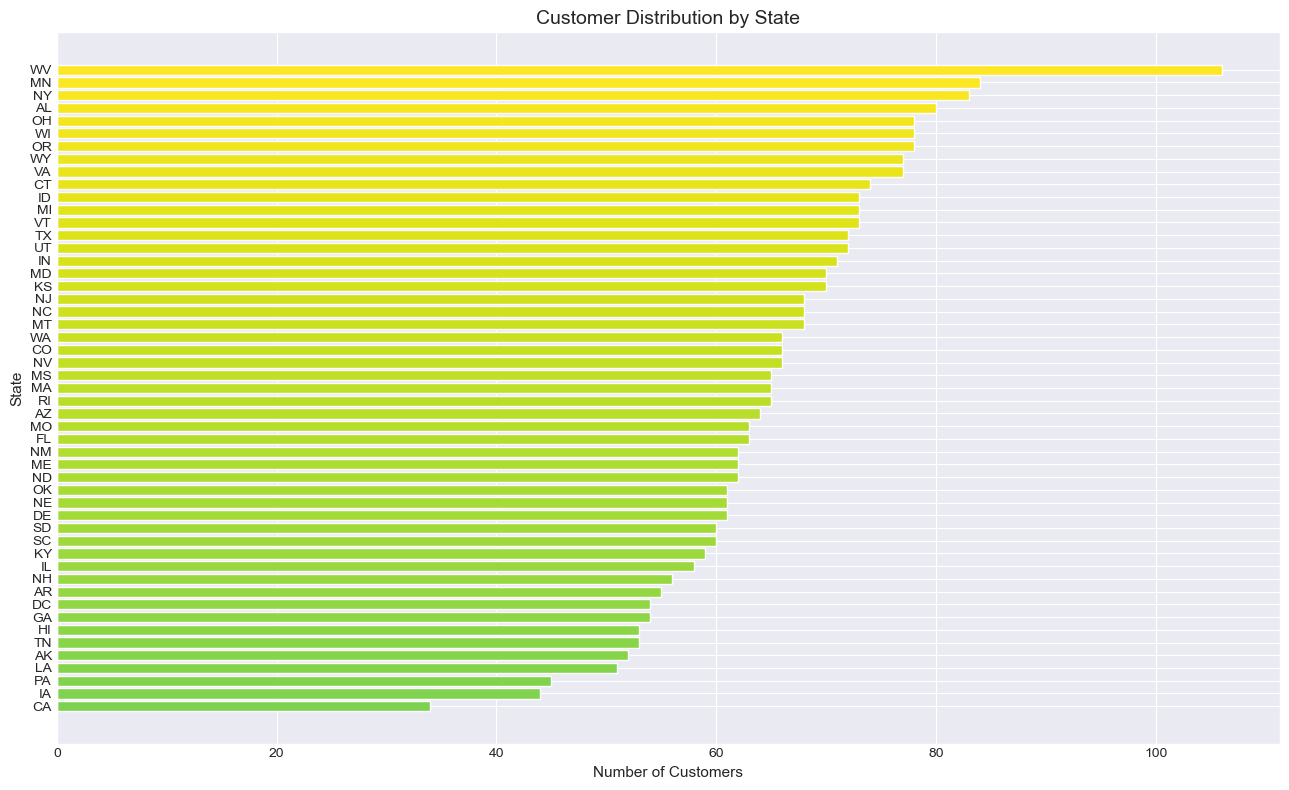

In [136]:
# Count customers per state
state_counts = data['state'].value_counts()

# Plot as a horizontal bar chart 
plt.figure(figsize=(13, 8))
colors = plt.cm.viridis_r(range(len(state_counts))) 

bars = plt.barh(state_counts.index, state_counts.values, color=colors)

plt.xlabel('Number of Customers', fontsize=11)
plt.ylabel('State', fontsize=11)
plt.title('Customer Distribution by State', fontsize=14)
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

#### *Observation:*

- WV (West Virginia) has the highest number of customers, followed closely by MN (Minnesota) and NY (New York).
- CA (California) and IA (Iowa) are at the bottom, meaning very few customers there.
- The distribution is right-skewed: a few states dominate the customer base, while many states have moderate numbers.
- This suggests that the company’s market penetration is stronger in certain regions (like WV, MN, NY) and weaker in others.

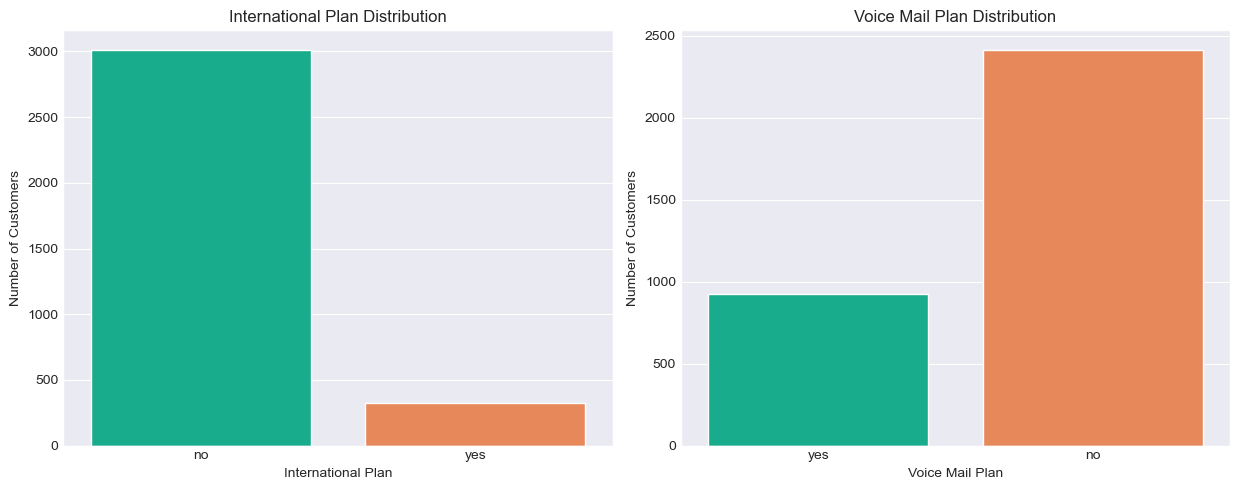

In [137]:
# Telecom-friendly colors: teal and orange
colors = ['#00C49A', '#FF8042']

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12.5, 5))

# Plot International Plan distribution
sns.countplot(x='intl_plan', data=data, ax=axes[0], palette=colors)
axes[0].set_title('International Plan Distribution', fontsize=12)
axes[0].set_xlabel('International Plan', fontsize=10)
axes[0].set_ylabel('Number of Customers', fontsize=10)

# Plot Voice Mail Plan distribution
sns.countplot(x='voicemail_plan', data=data, ax=axes[1], palette=colors)
axes[1].set_title('Voice Mail Plan Distribution', fontsize=12)
axes[1].set_xlabel('Voice Mail Plan', fontsize=10)
axes[1].set_ylabel('Number of Customers', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()